In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [4]:
url = "https://inshorts.com/en/read/technology"

In [11]:
news_data = []
news_category = url.split('/')
news_category

['https:', '', 'inshorts.com', 'en', 'read', 'technology']

In [12]:
news_category = news_category[-1]

In [13]:
data = requests.get(url)
data.content

b'<!doctype html>\n<html lang="en">\n\n<head>\n  <meta charset="utf-8" />\n  <style>\n    /* The Modal (background) */\n    .modal_contact {\n        display: none; /* Hidden by default */\n        position: fixed; /* Stay in place */\n        z-index: 8; /* Sit on top */\n        left: 0;\n        top: 0;\n        width: 100%; /* Full width */\n        height: 100%;\n        overflow: auto; /* Enable scroll if needed */\n        background-color: rgb(0,0,0); /* Fallback color */\n        background-color: rgba(0,0,0,0.4); /* Black w/ opacity */\n    }\n\n    /* Modal Content/Box */\n    .modal-content {\n        background-color: #fefefe;\n        margin: 15% auto;\n        padding: 20px !important;\n        padding-top: 0 !important;\n        /* border: 1px solid #888; */\n        text-align: center;\n        position: relative;\n        border-radius: 6px;\n    }\n\n    /* The Close Button */\n    .close {\n      left: 90%;\n      color: #aaa;\n      float: right;\n      font-size: 

In [7]:
soup = BeautifulSoup(data.content, 'html.parser')

In [21]:
news_articles = [{'news_headline': headline.find('span',attrs={'itemprop':'headline'}).string,
                 'news_article': article.find('div', attrs={'itemprop':'articleBody'}).string,
                 'news_category': news_category}
                for headline, article in zip(soup.find_all('div',class_=['news-card-title news-right-box']), soup.find_all('div',
                    class_=['news-card-content news-right-box']))]


In [22]:
news_data.extend(news_articles)
news_data

[{'news_headline': "Aarogya Setu doesn't give out loud siren near COVID-19 patients: Govt",
  'news_article': "The government has clarified that its Aarogya Setu app doesn't give out a loud siren when a COVID-19 patient approaches a user. It added that Aarogya Setu does not have an in-built siren but it gives out alerts. The coronavirus contact-tracing app Aarogya Setu had crossed 10 crore registered users in 41 days. ",
  'news_category': 'technology'},
 {'news_headline': 'Google has no plans yet to allow work-from-home permanently: CEO Pichai',
  'news_article': 'After Twitter announced its permanent work-from-home policy, Google CEO Sundar Pichai said the company has not yet committed to making such a permanent change. Pichai told Wired, "How productive will we be when different teams who don\'t normally work together have to come together for brainstorming, the creative process?" "We are going to have research, surveys...learn what works," he added.',
  'news_category': 'technology

In [18]:
df = pd.DataFrame(news_data)
df = df[['news_headline', 'news_article', 'news_category']]
df.head()

,news_headline,news_article,news_category
0,Aarogya Setu doesn't give out loud siren near ...,The government has clarified that its Aarogya ...,technology
1,Google has no plans yet to allow work-from-hom...,After Twitter announced its permanent work-fro...,technology
2,SC seeks Centre's reply on plea for ban on Zoo...,The Supreme Court on Friday sought Centre's re...,technology
3,Data of 2.9 crore Indian job seekers leaked on...,Personal data of 2.9 crore Indian job seekers ...,technology
4,Some of my tweets were definitely extremely du...,Tesla and SpaceX CEO Elon Musk admitted that s...,technology


In [19]:
#prepare user defined function to extract data from inshorts.com

In [31]:
urls_list = ['https://inshorts.com/en/read/technology',
           'https://inshorts.com/en/read/sports',
           'https://inshorts.com/en/read/world']

In [34]:
def datasetPrepare(urls_list):
    news_data = []
    for url in urls_list:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        news_articles = [{'news_headline': headline.find('span',attrs={'itemprop':'headline'}).string,
                 'news_article': article.find('div', attrs={'itemprop':'articleBody'}).string,
                 'news_category': news_category}
                for headline, article in zip(soup.find_all('div',class_=['news-card-title news-right-box']), soup.find_all('div',
                    class_=['news-card-content news-right-box']))]        
        news_data.extend(news_articles)
    df = pd.DataFrame(news_data)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df

In [35]:
news_df = datasetPrepare(url_list)
news_df.info()
news_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
news_headline    74 non-null object
news_article     74 non-null object
news_category    74 non-null object
dtypes: object(3)
memory usage: 1.9+ KB


,news_headline,news_article,news_category
0,Aarogya Setu doesn't give out loud siren near ...,The government has clarified that its Aarogya ...,technology
1,Google has no plans yet to allow work-from-hom...,After Twitter announced its permanent work-fro...,technology
2,Data of 2.9 crore Indian job seekers leaked on...,Personal data of 2.9 crore Indian job seekers ...,technology
3,SC seeks Centre's reply on plea for ban on Zoo...,The Supreme Court on Friday sought Centre's re...,technology
4,"Fastest internet speed of 44.2 Tbps recorded, ...","Researchers from Australia's Monash, Swinburne...",technology


In [36]:
#Text wrangling and preprocessing


In [46]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

In [48]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [50]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [53]:
#Removal html tags
def strip_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    stripped_text = soup.get_text()
    return stripped_text
strip_html_tags("<html><h2>Some  important text</h2></html>")

'Some  important text'

In [54]:
#Removw accented character
def remove_accented_chars(text):
    text = unicodedata.normalize("NFKD", text).encode('ascii','ignore').decode('utf-8', 'ignore')
    return text
remove_accented_chars("diakritikós")

'diakritikos'

In [57]:
#Remove special chars
def remove_special_chars(text, remove_digits=False):
    pattern= r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, ' ', text)
    return text
remove_special_chars("Well this was fun!!!", remove_digits=True)

'Well this was fun   '

In [58]:
#text lemmatization
def lemmatize(text):
    text =nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text
lemmatize("My systems keeps crashing!!")

'My system keep crash ! !'

In [59]:
#Text stemming
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text
simple_stemmer("My system keeps crashing!!!")

'My system keep crashing!!!'

In [62]:
#Remove stopwords
def remove_stopwords(text, is_lower_case = False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
remove_stopwords("the, and, if are stopwords")

', , stopwords'

In [69]:
#Building text normalizer
def normalize_corpus(corpus, html_stripping=True, contraction_expantion=True,
                     accented_char_removal=True, text_lemmatization=True, special_char_removal=True,
                    stopword_removal=True, remove_digits=True, text_lower_case=True):
    normalized_corpus = []
    #normalize each document in the corpus
    for doc in corpus:
        #strip html
        if html_stripping:
            doc = strip_html_tags(doc)
        #remove accented char
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        #lowercase the text
        if text_lower_case:
            doc = doc.lower()
        #remove extra new line
        doc = re.sub(r'[\r|\n|\r|\n]+', ' ', doc)
        #lemmatize text
        if text_lemmatization:
            doc = lemmatize(doc)
        #remove special chars and/or digits
        if special_char_removal:
            #insert space between special chars to isolate them
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub("\\1 ", doc)
            doc = remove_special_chars(doc, remove_digits=remove_digits)
        #remove extra whitespace
        #doc = re.sub('+', ' ', doc)
        #remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
        normalized_corpus.append(doc)
    return normalized_corpus

In [70]:
#preprocess and normalie news articles
news_df['full_text'] = news_df['news_headline'].map(str)+'.'+news_df['news_article']
news_df['clean_text'] = normalize_corpus(news_df['full_text'])
norm_corpus = list(news_df['clean_text'])

{'full_text': 'Google has no plans yet to allow work-from-home permanently: CEO Pichai.After Twitter announced its permanent work-from-home policy, Google CEO Sundar Pichai said the company has not yet committed to making such a permanent change. Pichai told Wired, "How productive will we be when different teams who don\'t normally work together have to come together for brainstorming, the creative process?" "We are going to have research, surveys...learn what works," he added.',
 'clean_text': 'google no plan yet allow work home permanently ceo pichai twitter announce permanent work home policy google ceo sundar pichai say company not yet commit make permanent change pichai tell wired productive different team not normally work together come together brainstorm creative process go research survey learn work add'}

In [71]:
#save the news articles
news_df.to_csv("news_csv", index=False, encoding='utf-8')

In [72]:
#Parts of Speech

In [73]:
news_df = pd.read_csv('news_csv')

In [76]:
news_df.head()

,news_headline,news_article,news_category,full_text,clean_text
0,Aarogya Setu doesn't give out loud siren near ...,The government has clarified that its Aarogya ...,technology,Aarogya Setu doesn't give out loud siren near ...,aarogya setu not give loud siren near covid pa...
1,Google has no plans yet to allow work-from-hom...,After Twitter announced its permanent work-fro...,technology,Google has no plans yet to allow work-from-hom...,google no plan yet allow work home permanently...
2,Data of 2.9 crore Indian job seekers leaked on...,Personal data of 2.9 crore Indian job seekers ...,technology,Data of 2.9 crore Indian job seekers leaked on...,datum crore indian job seeker leak dark web cy...
3,SC seeks Centre's reply on plea for ban on Zoo...,The Supreme Court on Friday sought Centre's re...,technology,SC seeks Centre's reply on plea for ban on Zoo...,sc seek centre reply plea ban zoom app privacy...
4,"Fastest internet speed of 44.2 Tbps recorded, ...","Researchers from Australia's Monash, Swinburne...",technology,"Fastest internet speed of 44.2 Tbps recorded, ...",fast internet speed tbp record download k hd m...


In [77]:
corpus = normalize_corpus(news_df['full_text'], text_lower_case=False, text_lemmatization=False,
                         special_char_removal=False)
sentence = str(news_df.iloc[1].news_headline)
sentence_nlp = nlp(sentence)

In [78]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]

In [79]:
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

,Word,POS tag,Tag type
0,Google,NNP,PROPN
1,has,VBZ,AUX
2,no,DT,DET
3,plans,NNS,NOUN
4,yet,RB,ADV
5,to,TO,PART
6,allow,VB,VERB
7,work,NN,NOUN
8,-,HYPH,PUNCT
9,from,IN,ADP


In [80]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [81]:
nltk.download("maxent_treebank_pos_tagger")

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [82]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [83]:
nltk_pos_tagged = nltk.pos_tag(sentence.split())

In [86]:
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

,Word,POS tag
0,Google,NNP
1,has,VBZ
2,no,DT
3,plans,NNS
4,yet,RB
5,to,TO
6,allow,VB
7,work-from-home,JJ
8,permanently:,NN
9,CEO,NNP


In [87]:
#Name Entity Recognition

In [88]:
sentence = str(news_df.iloc[1].full_text)
sentence_nlp = nlp(sentence)
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

[(Google, 'ORG'), (Pichai, 'PERSON'), (Twitter, 'PERSON'), (Google, 'ORG'), (Sundar, 'PERSON'), (Pichai, 'PERSON'), (Pichai, 'PERSON'), (Wired, 'PERSON')]


In [89]:
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity=None
            
entity_frame = pd.DataFrame(named_entities, columns=['Entity Name', 'Entity Type'])
                

In [90]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type']).size()
                .sort_values(ascending=False).reset_index().rename(columns={0: 'Frequency'}))

In [92]:
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,US,India,UK,Australia,Amazon,Pakistan,China,Spain,UN,Indian,Zoom,Apple,600 %,Dhoni,first
Entity Type,GPE,GPE,GPE,GPE,ORG,GPE,GPE,GPE,ORG,NORP,PERSON,ORG,PERCENT,PERSON,ORDINAL
Frequency,16,15,10,9,8,8,7,7,6,5,5,4,4,4,4


In [93]:
top_entieies = (entity_frame.groupby(by=['Entity Type']).size()
               .sort_values(ascending=False).reset_index().rename(columns={0: 'Frequency'}))

In [94]:
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,US,India,UK,Australia,Amazon,Pakistan,China,Spain,UN,Indian,Zoom,Apple,600 %,Dhoni,first
Entity Type,GPE,GPE,GPE,GPE,ORG,GPE,GPE,GPE,ORG,NORP,PERSON,ORG,PERCENT,PERSON,ORDINAL
Frequency,16,15,10,9,8,8,7,7,6,5,5,4,4,4,4


In [95]:
#Emotion and Sentimental Analysis

In [96]:
from afinn import Afinn
af = Afinn()

In [97]:
sentiment_scores = [af.score(article) for article in corpus]
sentiment_category = ['positive' if score > 0 else 'negative' if score < 0 else 'neutral' for 
                     score  in sentiment_scores]

In [98]:
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores, sentiment_category]).T

In [99]:
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']

In [100]:
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                                
                        count      mean       std   min  25%  50%   75%   max
news_category                                                                
sports                   25.0  0.720000  5.481180  -8.0 -2.0  0.0  1.00  13.0
technology               24.0 -0.458333  4.549048 -14.0 -2.0  0.0  1.25   8.0
world                    25.0 -3.000000  4.444097 -15.0 -4.0 -3.0  0.00   4.0

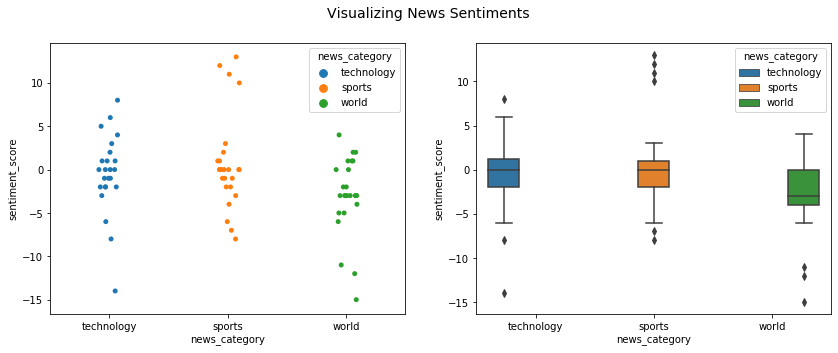

In [105]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
sp = sns.stripplot(x='news_category', y='sentiment_score', hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y='sentiment_score', hue='news_category', data=df, ax=ax2)
t = f.suptitle("Visualizing News Sentiments", fontsize=14)

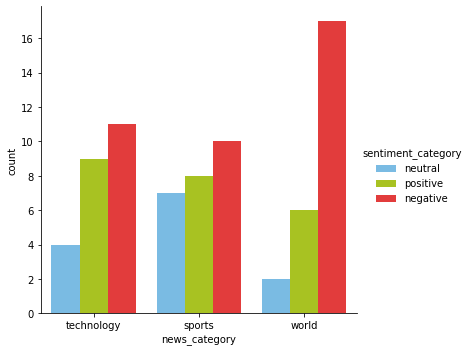

In [107]:
fc = sns.factorplot(x='news_category', hue='sentiment_category', data=df, kind='count',
                   palette={"negative" : "#FE2020",
                           "positive": "#BADD07",
                           "neutral": "#68BFF5"})

In [108]:
pos_idx = df[(df.news_category == 'technology') & (df.sentiment_score==2)].index[0]
neg_idx = df[(df.news_category == 'technology') & (df.sentiment_score==-2)].index[0]

In [110]:
print("Most negative Tech News Article:", news_df.iloc[neg_idx][['news_article']][0])
print()
print("Most positive Tech News Article:", news_df.iloc[pos_idx][['news_article']][0])

Most negative Tech News Article: Personal data of 2.9 crore Indian job seekers has been leaked on the dark web for free, cybersecurity intelligence firm Cyble said. It includes details about job seekers' education, address, etc, Cyble said in a blog post. "The original leak appears to be from a resume aggregator service collecting data from various known job portals," Cyble added.

Most positive Tech News Article: US-based private equity firm KKR has said it negotiated the $1.5 billion deal to buy 2.3% stake in Jio Platforms in just 10 days. The deal, which is KKR's biggest Asian transaction, was done over Zoom calls, said Sanjay Nayar, CEO of KKR India. "We invested in Mukesh Ambani's entrepreneurial vision backed by a world class management," Nayar said.


In [111]:
df1 = df[df.news_category=='world']
pd.unique(df1.sentiment_score)

array([  1.,   2.,  -3., -15.,   0.,   4., -11.,  -4., -12.,  -5.,  -2.,
        -6.])

In [112]:
pos_idx = df[(df.news_category == 'world') & (df.sentiment_score == 4)].index[0]
neg_idx = df[(df.news_category == 'world') & (df.sentiment_score == -4)].index[0]
print("Most negative world news article:", news_df.iloc[neg_idx][['news_article']][0])
print()
print("Most positive world news article:", news_df.iloc[pos_idx][['news_article']][0])

Most negative world news article: A Pakistan International Airlines (PIA) spokesperson said that the flight data recorder and cockpit voice recorder have been recovered from site of the plane crash in Karachi. A PIA flight with 99 people aboard crashed into a residential area near the Jinnah International Airport in Karachi on Friday. Sindh health officials said that 97 people were killed while two survived.

Most positive world news article: After slain Saudi journalist Jamal Khashoggi's family said that they have forgiven his killers, Agnès Callamard, a UN investigator said that the move represented the "first steps towards their eventual release". "Saudi authorities are playing out what they hope will be the final act in their well-rehearsed parody of justice in front of an international community," Callamard added.
